## Importing Packages

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm
from scipy import stats
from dtaidistance import dtw

ModuleNotFoundError: No module named 'dtaidistance'

## Generating White Noise Timeseries

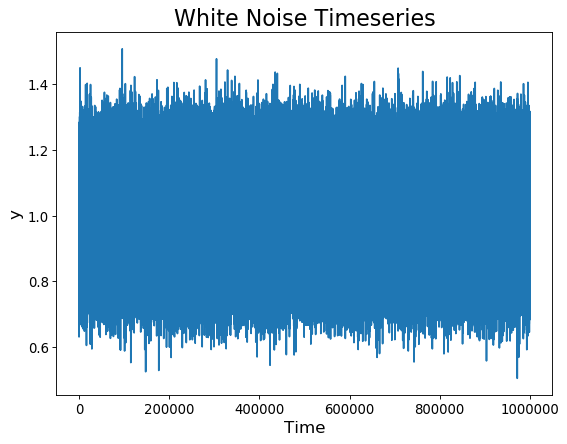

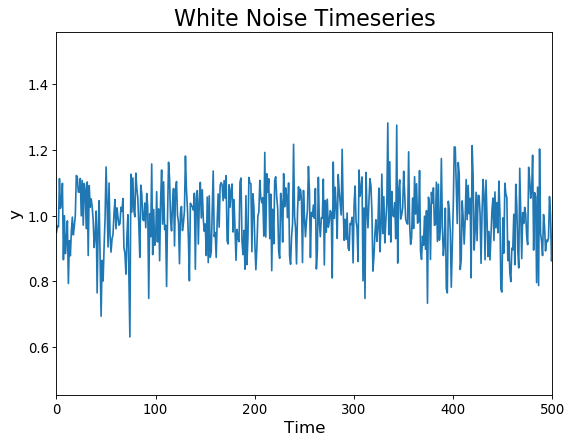

In [10]:
length = 1000000
mean = 1
std = 0.1
samples = np.random.normal(mean, std, size = length)

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(samples)
plt.title('White Noise Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(samples)
plt.xlim(0, 500)
plt.title('White Noise Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)

plt.show()

## Inspect the distribution and insure it is Gaussian

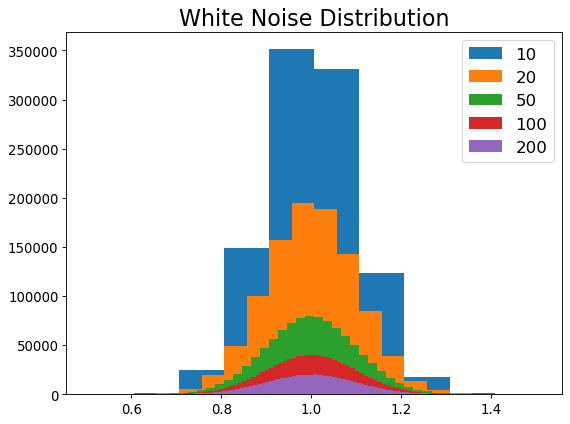

In [11]:
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.hist(samples, bins = 10, label = '10')
plt.hist(samples, bins = 20, label = '20')
plt.hist(samples, bins = 50, label = '50')
plt.hist(samples, bins = 100, label = '100')
plt.hist(samples, bins = 200, label = '200')
plt.title('White Noise Distribution', fontsize = 20)
plt.legend(prop={'size': 15})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


## Autocorrelation on just white noise

In [12]:
acf_WN = sm.tsa.acf(samples, nlags=1000)

/Users/kevinmoposita/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [13]:
x = np.linspace(0, 1000, 1001)

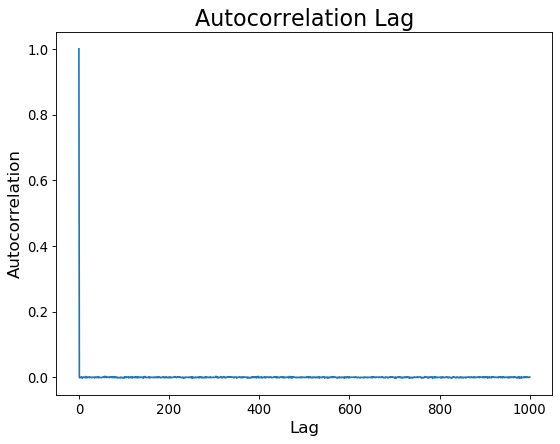

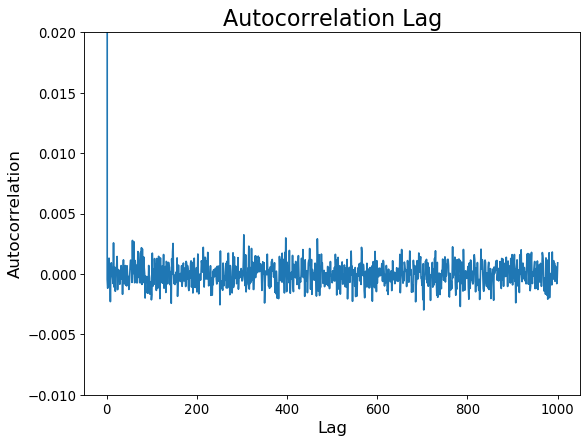

In [18]:
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(x, acf_WN)
plt.title('Autocorrelation Lag', fontsize = 20)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(x, acf_WN)
plt.title('Autocorrelation Lag', fontsize = 20)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(-0.01, 0.02)





plt.show()

## Injecting periodic pulse every 200 seconds

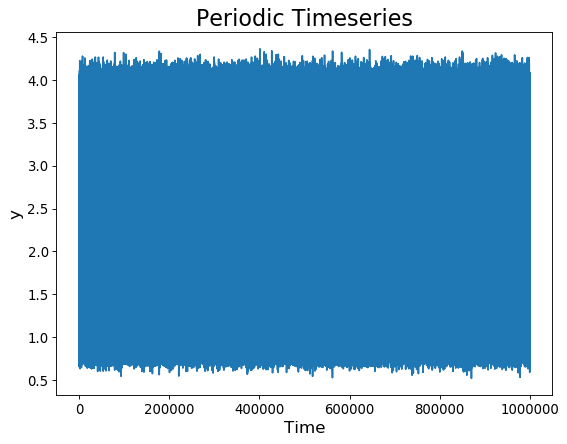

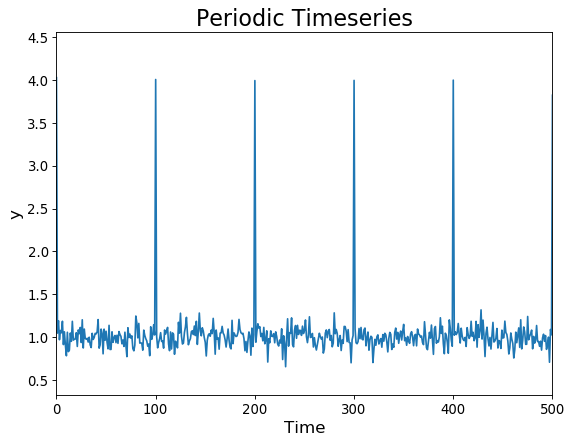

In [31]:
pulse = np.random.normal(mean, std, size = length)
c = 0
while c < len(pulse):
    if c % 100 == 0:
        pulse[c] = pulse[c] + 3
        c = c + 1
    else:
        c = c + 1

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(pulse)
plt.title('Periodic Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('y', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(pulse)
plt.xlim(0, 500)
plt.title('Periodic Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('y', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

plt.show()

## Autocorrelation on Periodic Timeseries

In [32]:
acf_periodic = sm.tsa.acf(pulse, nlags=1000)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

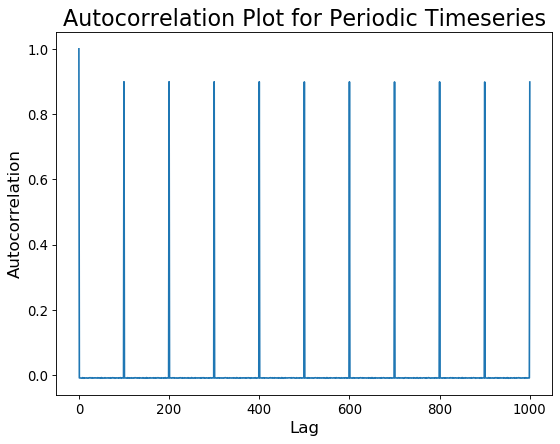

In [33]:
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(x, acf_periodic)
plt.title('Autocorrelation Plot for Periodic Timeseries', fontsize = 20)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

## Hidden Periodic Signal

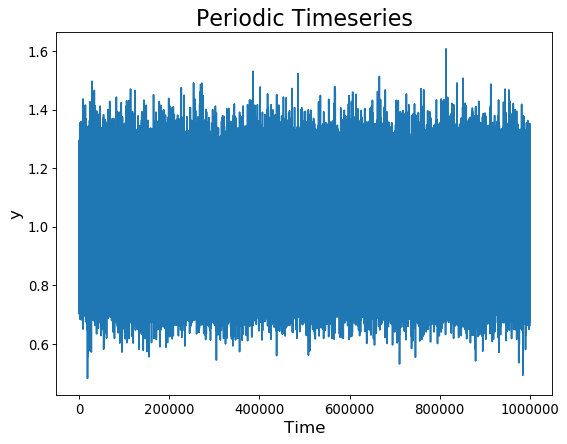

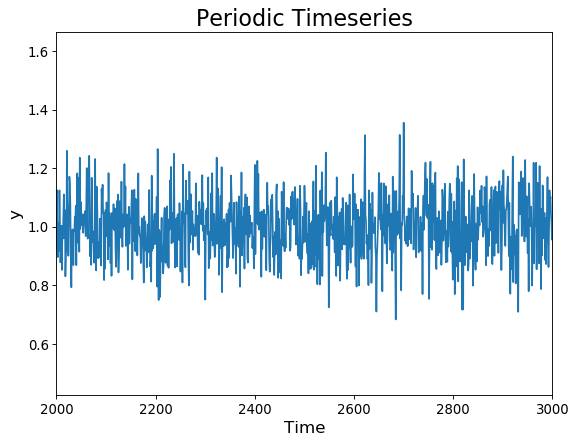

In [216]:
hidden_pulse = np.random.normal(mean, std, size = length)
g = 0
while g < len(hidden_pulse):
    if g % 300 == 0:
        hidden_pulse[g] = hidden_pulse[g] + 0.2
        g = g + 1
    else:
        g = g + 1
        
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(hidden_pulse)
plt.title('Periodic Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('y', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(hidden_pulse)
plt.xlim(2000, 3000)
plt.title('Periodic Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('y', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

plt.show()

In [35]:
acf_hidden = sm.tsa.acf(hidden_pulse, nlags=1000)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


(-0.01, 0.025)

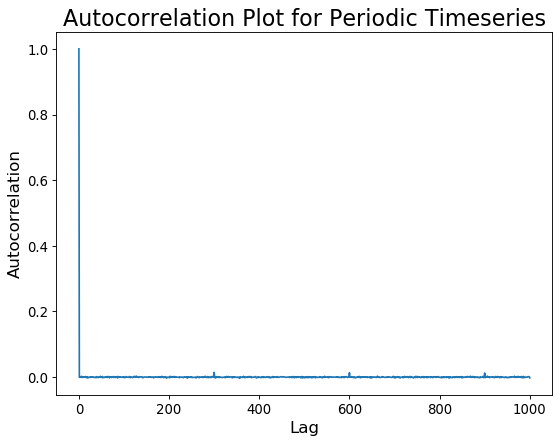

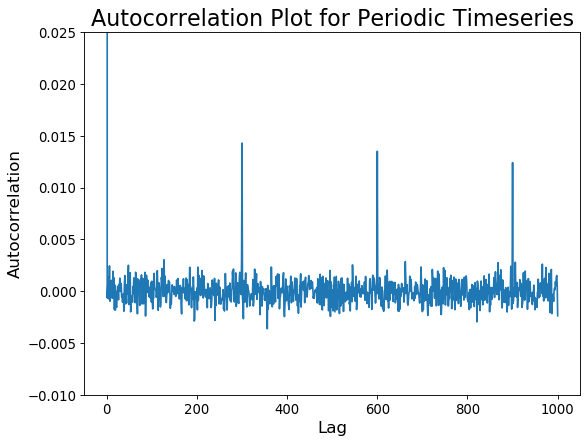

In [40]:
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(x, acf_hidden)
plt.title('Autocorrelation Plot for Periodic Timeseries', fontsize = 20)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(x, acf_hidden)
plt.title('Autocorrelation Plot for Periodic Timeseries', fontsize = 20)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(-0.01, 0.025)

## ACF on sine wave

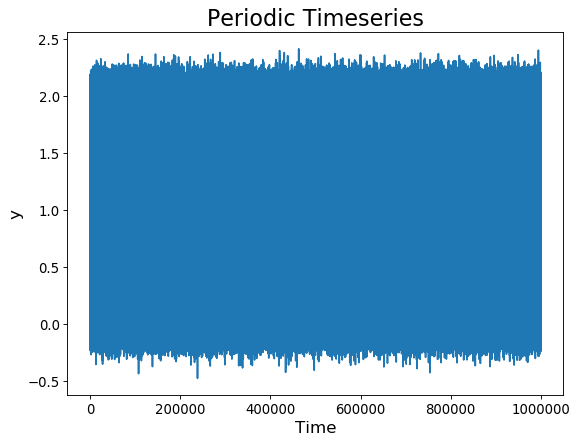

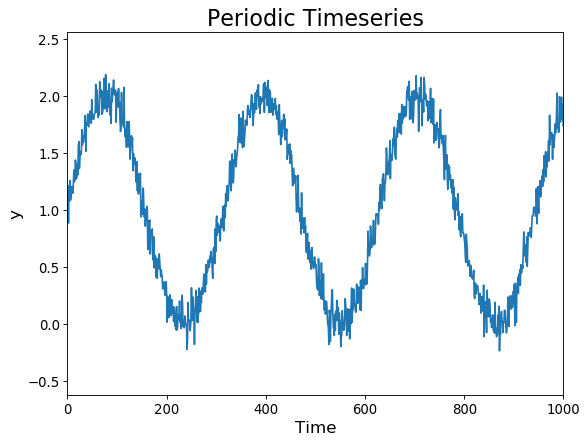

In [19]:
x_new = np.linspace(0, 999999, 1000000)
sin = np.sin(x_new / 50)

new_samples = np.random.normal(mean, std, size = length)
sine_wave = sin + new_samples

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(sine_wave)
plt.title('Periodic Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('y', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(sine_wave)
plt.xlim(0, 1000)
plt.title('Periodic Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('y', fontsize = 15)
plt.xlabel('Time', fontsize = 15)

plt.show()

In [42]:
acf_sine = sm.tsa.acf(sine_wave, nlags=1000)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 <a list of 11 Text yticklabel objects>)

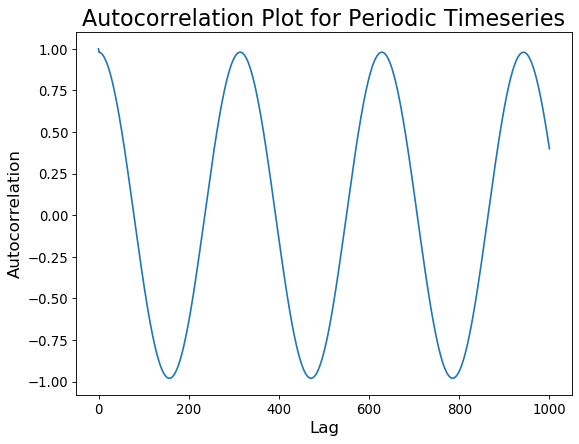

In [43]:
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(x, acf_sine)
plt.title('Autocorrelation Plot for Periodic Timeseries', fontsize = 20)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

## Determining outliers

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


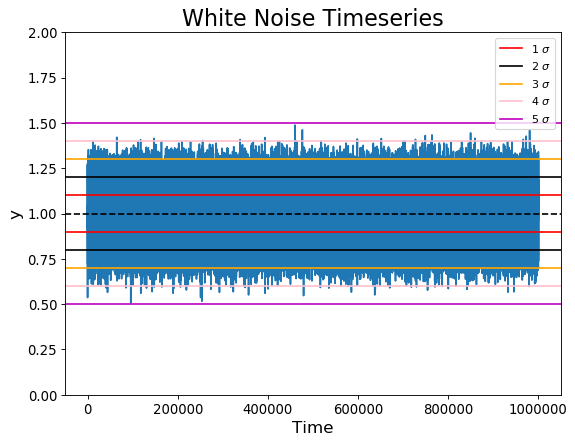

In [64]:
figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(samples)
plt.title('White Noise Timeseries', fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)

plt.axhline(1+std, color = 'r', label = '1 $\sigma$')
plt.axhline(1-std, color = 'r')

plt.axhline(1+(2*std), color = 'k', label = '2 $\sigma$')
plt.axhline(1-(2*std), color = 'k')

plt.axhline(1+(3*std), color = 'orange', label = '3 $\sigma$')
plt.axhline(1-(3*std), color = 'orange')

plt.axhline(1+(4*std), color = 'pink', label = '4 $\sigma$')
plt.axhline(1-(4*std), color = 'pink')

plt.axhline(1+(5*std), color = 'm', label = '5 $\sigma$')
plt.axhline(1-(5*std), color = 'm')

plt.axhline(1, color = 'k', linestyle = '--')

plt.ylim(0, 2)
plt.legend()
plt.show()

In [74]:
print('Theoretical Outliers')
print('1 sigma:', int((1-0.682689)*length))
print('2 sigma:', int((1-0.9545)*length))
print('3 sigma:', int((1-0.997300)*length))
print('4 sigma:', int((1-0.999937)*length))
print('5 sigma:', int((1-0.999999)*length))

Theoretical Outliers
1 sigma: 317311
2 sigma: 45499
3 sigma: 2700
4 sigma: 63
5 sigma: 1


In [81]:
one = 0
for i in samples:
    if 1-std < i < 1+std:
        one = one + 1
        
two = 0
for i in samples:
    if 1-(2*std) < i < 1+(2*std):
        two = two + 1
        
three = 0
for i in samples:
    if 1-(3*std) < i < 1+(3*std):
        three = three + 1
        
four = 0
for i in samples:
    if 1-(4*std) < i < 1+(4*std):
        four = four + 1
        
five = 0
for i in samples:
    if 1-(5*std) < i < 1+(5*std):
        five = five + 1

In [85]:
print('Actual Outliers')
print('1 sigma:', 1000000 - one, (1000000 - one) / 1000000)
print('2 sigma:', 1000000 - two, (1000000 - two) / 1000000)
print('3 sigma:', 1000000 - three, (1000000 - three) / 1000000)
print('4 sigma:', 1000000 - four, (1000000 - four) / 1000000)
print('5 sigma:', 1000000 - five, (1000000 - five) / 1000000)

Actual Outliers
1 sigma: 318178 0.318178
2 sigma: 45674 0.045674
3 sigma: 2660 0.00266
4 sigma: 64 6.4e-05
5 sigma: 0 0.0


## Cumulative Function

slope: 0.9995499521041714
y-intercept: 170.89734808076173


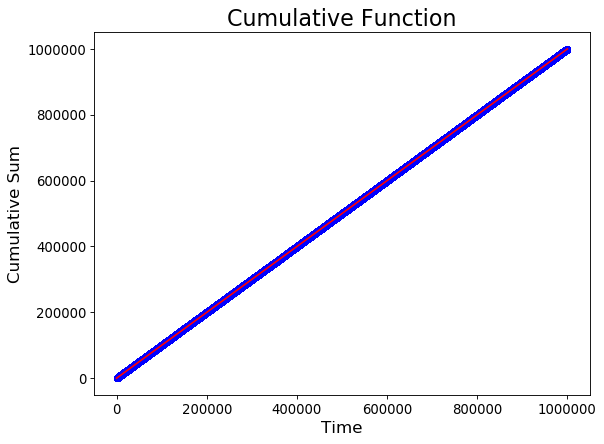

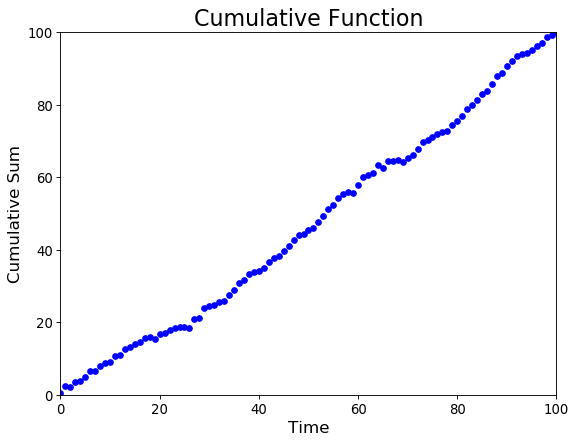

In [37]:
samples_1 = np.random.normal(mean, std, size = length)
cdf = np.cumsum(samples_1)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_new,cdf)
print('slope:', slope)
print('y-intercept:', intercept)
y_new = (slope * x_new) + intercept

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(x_new, cdf, 'b.', markersize = 10)
plt.title('Cumulative Function', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Cumulative Sum', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.plot(x_new, y_new, 'r')

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(x_new, cdf, 'b.', markersize = 10)
plt.title('Cumulative Function', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Cumulative Sum', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.plot(x_new, y_new, 'r')

plt.show()

## Pearson Correlation

## For two white noise time series

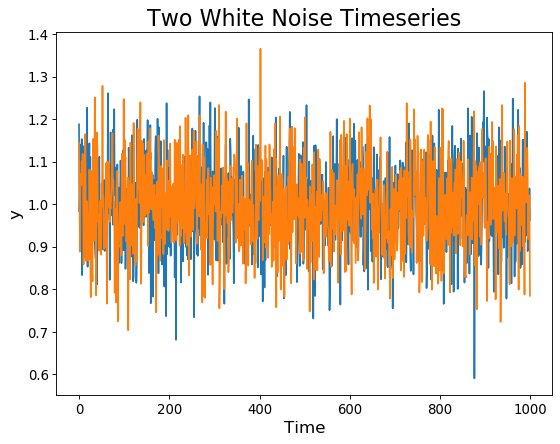

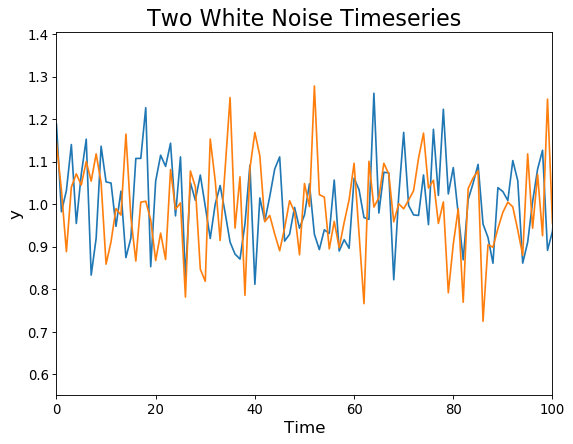

In [225]:
new_length = 1000
WN_1 = np.random.normal(mean, std, size = new_length)
WN_2 = np.random.normal(mean, std, size = new_length)

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(WN_1)
plt.plot(WN_2)
plt.title('Two White Noise Timeseries', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(WN_1)
plt.plot(WN_2)
plt.xlim(0, 100)
plt.title('Two White Noise Timeseries', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [201]:
r_WN, p_WN = stats.pearsonr(WN_1, WN_2)
print('Pearson r for WN:', r_WN)

Pearson r for WN: 0.0015612437220144386


## Let's look at some noisy linear trends

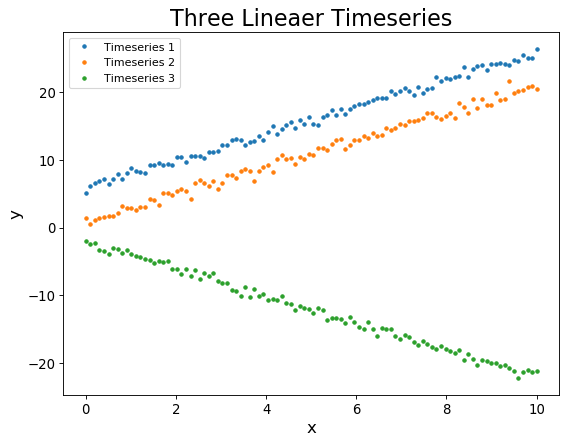

In [73]:
Noise_1 = np.random.normal(mean, 0.5, size = 100)
Noise_2 = np.random.normal(mean, 0.5, size = 100)
Noise_3 = np.random.normal(mean, 0.5, size = 100)

x_linear = np.linspace(0, 10, 100)
x_pos = 2 * x_linear
x_pos = x_pos + Noise_1
x_pos_2 = (2 * x_linear) + 5
x_pos_2 = x_pos_2 + Noise_2
x_neg = (- 2 * x_linear) - 3
x_neg = x_neg + Noise_3

figure(figsize=(8, 6), dpi=80)
plt.plot(x_linear, x_pos_2, '.', label = 'Timeseries 1')
plt.plot(x_linear, x_pos, '.', label = 'Timeseries 2')
plt.plot(x_linear, x_neg, '.', label = 'Timeseries 3')
plt.title('Three Lineaer Timeseries', fontsize = 20)
plt.ylabel('y', fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.legend()
plt.show()

In [74]:
r_12, p_12 = stats.pearsonr(x_pos, x_pos_2) 
print('r for 1 and 2:', r_12)
r_13, p_13 = stats.pearsonr(x_pos, x_neg)
print('r for 1 and 3:', r_13)
r_23, p_23 = stats.pearsonr(x_pos_2, x_neg) 
print('r for 2 and 3:', r_23)

r for 1 and 2: 0.9912835785345796
r for 1 and 3: -0.9914403031089688
r for 2 and 3: -0.9947222665287108


## Cross Correlation for white noise

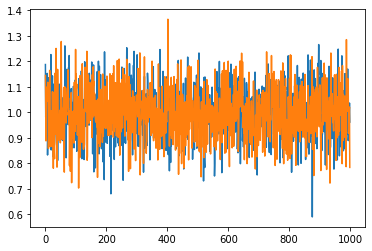

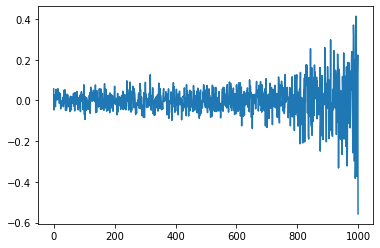

In [226]:
new_WN_1 = np.zeros(2000)
g = 0
while g < len(new_WN_1):
    if 500 < g < 1500:
        new_WN_1[g] = WN_1[g-500]
        g = g+1
    else:
        g = g+1

new_WN_2 = np.zeros(2000)
g = 0
while g < len(new_WN_2):
    if 500 < g < 1500:
        new_WN_2[g] = WN_2[g-500]
        g = g+1
    else:
        g = g+1
        
plt.plot(WN_1)
plt.plot(WN_2)

ccf_WN = sm.tsa.stattools.ccf(WN_1, WN_2)

plt.figure(2)
plt.plot(ccf_WN)

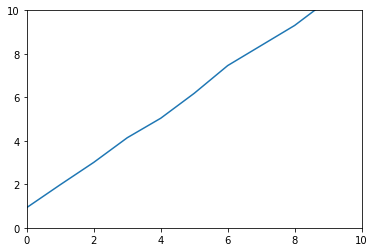

In [230]:
new_ccf = np.correlate(WN_1, WN_2, 'full')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot(new_ccf)

## Square Waves

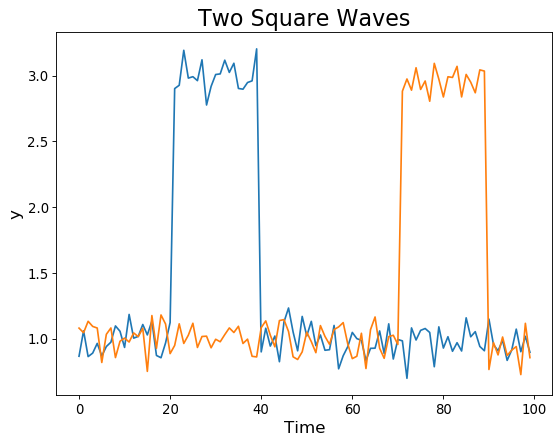

In [89]:
s_1 = np.zeros(100)
q = 0
while q < len(s_1):
    if 20 < q < 40:
        s_1[q] = 2
        q = q + 1
    else:
        q = q + 1
        
s_2 = np.zeros(100)
w = 0
while w < len(s_2):
    if 70 < w < 90:
        s_2[w] = 2
        w = w + 1
    else:
        w = w + 1

s_1_noise = np.random.normal(mean, 0.1, size = len(s_1))
s_1 = s_1 + s_1_noise

s_2_noise = np.random.normal(mean, 0.1, size = len(s_2))
s_2 = s_2 + s_2_noise


figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.title('Two Square Waves', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.plot(s_1)
plt.plot(s_2)

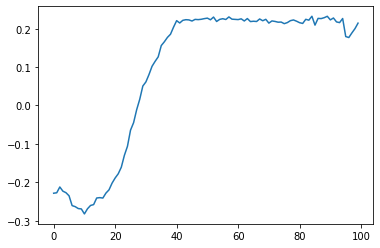

In [91]:
ccf_square = sm.tsa.stattools.ccf(s_1, s_2)
plt.plot(ccf_square)

## Cross Correlation on mock spectral line

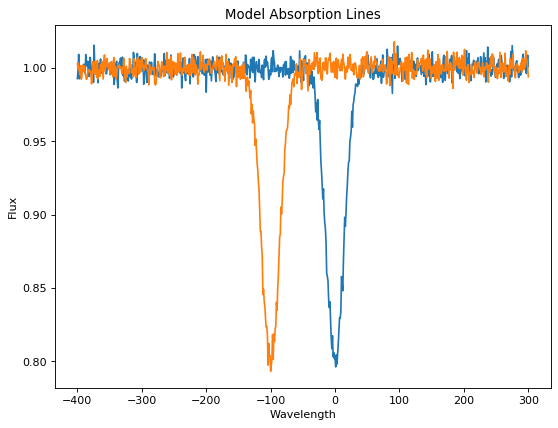

In [244]:
x_s = np.linspace(-400, 300, 701)
FWHM = 10

line_1 =  1 - ( 0.2 * np.exp(-((x_s)**2) / (2 * FWHM)**2))
line_1_N = np.random.normal(0, 0.005, size = len(x_s))
line_1 = line_1 + line_1_N
real_line_1 = np.zeros(801)
line_2 = 1 - ( 0.2 * np.exp(-((x_s + 100)**2) / (2 * FWHM)**2))
line_2_N = np.random.normal(0, 0.005, size = len(x_s))
line_2 = line_2 + line_2_N
'''
o = 0
while o < len(real_line_1):
    if 200 < o < 600:
        real_line_1[o] = line_1[o-200]
        o = o + 1
    else:
        o = o + 1



real_line_2 = np.zeros(801)
o = 0
while o < len(real_line_2):
    if 200 < o < 600:
        real_line_2[o] = line_2[o-200]
        o = o + 1
    else:
        o = o + 1     
'''
x_s_new = np.linspace(-200, 600, 801)

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(x_s, line_1)
plt.plot(x_s, line_2)
plt.title('Model Absorption Lines')
plt.ylabel('Flux')
plt.xlabel('Wavelength')



plt.show()

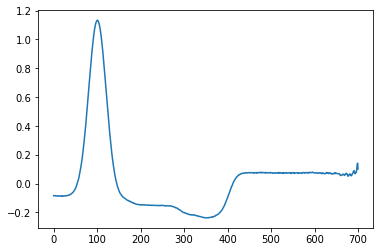

In [245]:
ccf_spectra = sm.tsa.stattools.ccf(line_1, line_2 )
plt.plot(ccf_spectra)


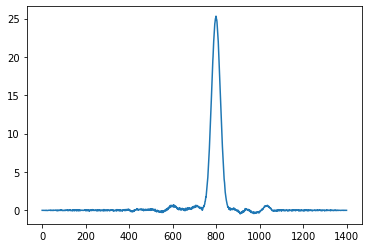

In [199]:
xcorr = np.correlate(line_1, line_2, 'full')
plt.plot(xcorr)

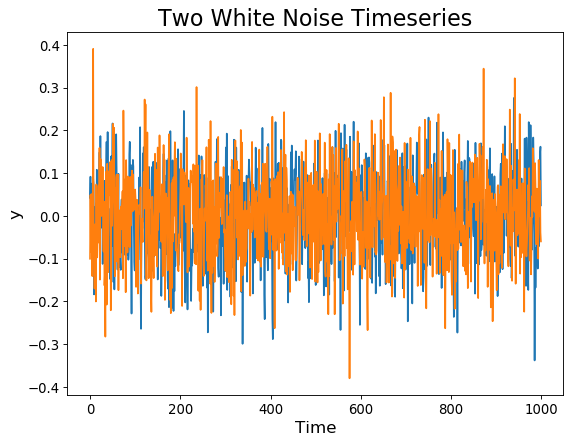

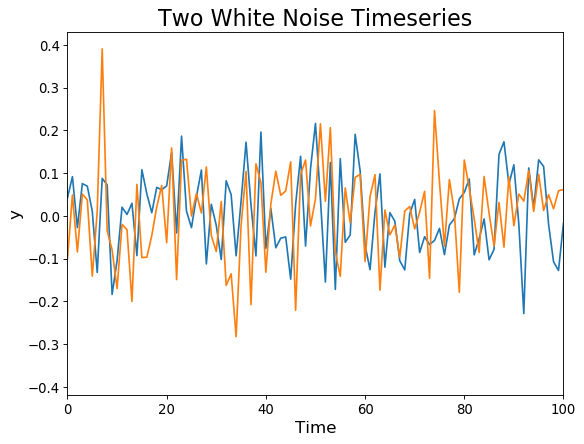

In [233]:
new_length = 1000
WN_1 = np.random.normal(0, std, size = new_length)
WN_2 = np.random.normal(0, std, size = new_length)

figure(figsize=(8, 6), dpi=80)
plt.figure(1)
plt.plot(WN_1)
plt.plot(WN_2)
plt.title('Two White Noise Timeseries', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

figure(figsize=(8, 6), dpi=80)
plt.figure(2)
plt.plot(WN_1)
plt.plot(WN_2)
plt.xlim(0, 100)
plt.title('Two White Noise Timeseries', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

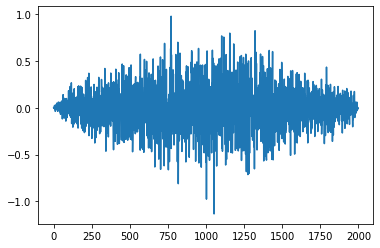

In [235]:
ccf_WN = np.correlate(WN_1, WN_2, 'full')
plt.plot(ccf_WN)

(0, 400)

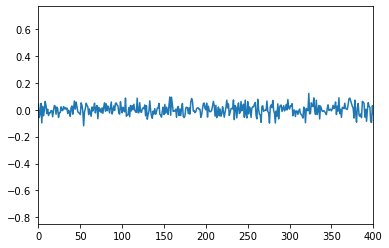

In [260]:
ccf_Wn_2 = sm.tsa.stattools.ccf(WN_1, WN_2)
plt.plot(ccf_Wn_2)
plt.xlim(0, 400)

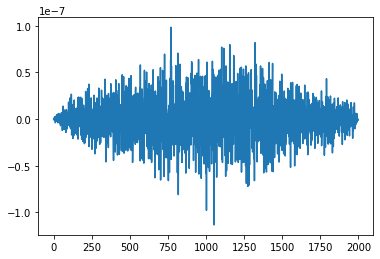

In [240]:
wn_1 = (WN_1 - np.mean(WN_1)) / (np.std(WN_1) * len(WN_1) * len(WN_1))
wn_2 = (WN_2 - np.mean(WN_2)) / (np.std(WN_2) * len(WN_2))
ccf_wn = np.correlate(wn_1, wn_2, 'full')
plt.plot(ccf_wn)

## CCF on sine waves

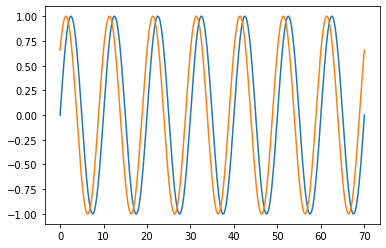

In [258]:
x_sine = np.linspace(0, 70, 1000)
sin_1 = np.sin(x_sine * (2*np.pi)/ 10)
sin_2 = np.sin((x_sine * (2*np.pi)/ 10) + 7)

plt.plot(x_sine, sin_1)
plt.plot(x_sine, sin_2)

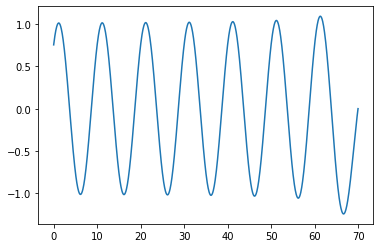

In [259]:
ccf_sines = sm.tsa.stattools.ccf(sin_1, sin_2)
plt.plot(x_sine, ccf_sines)